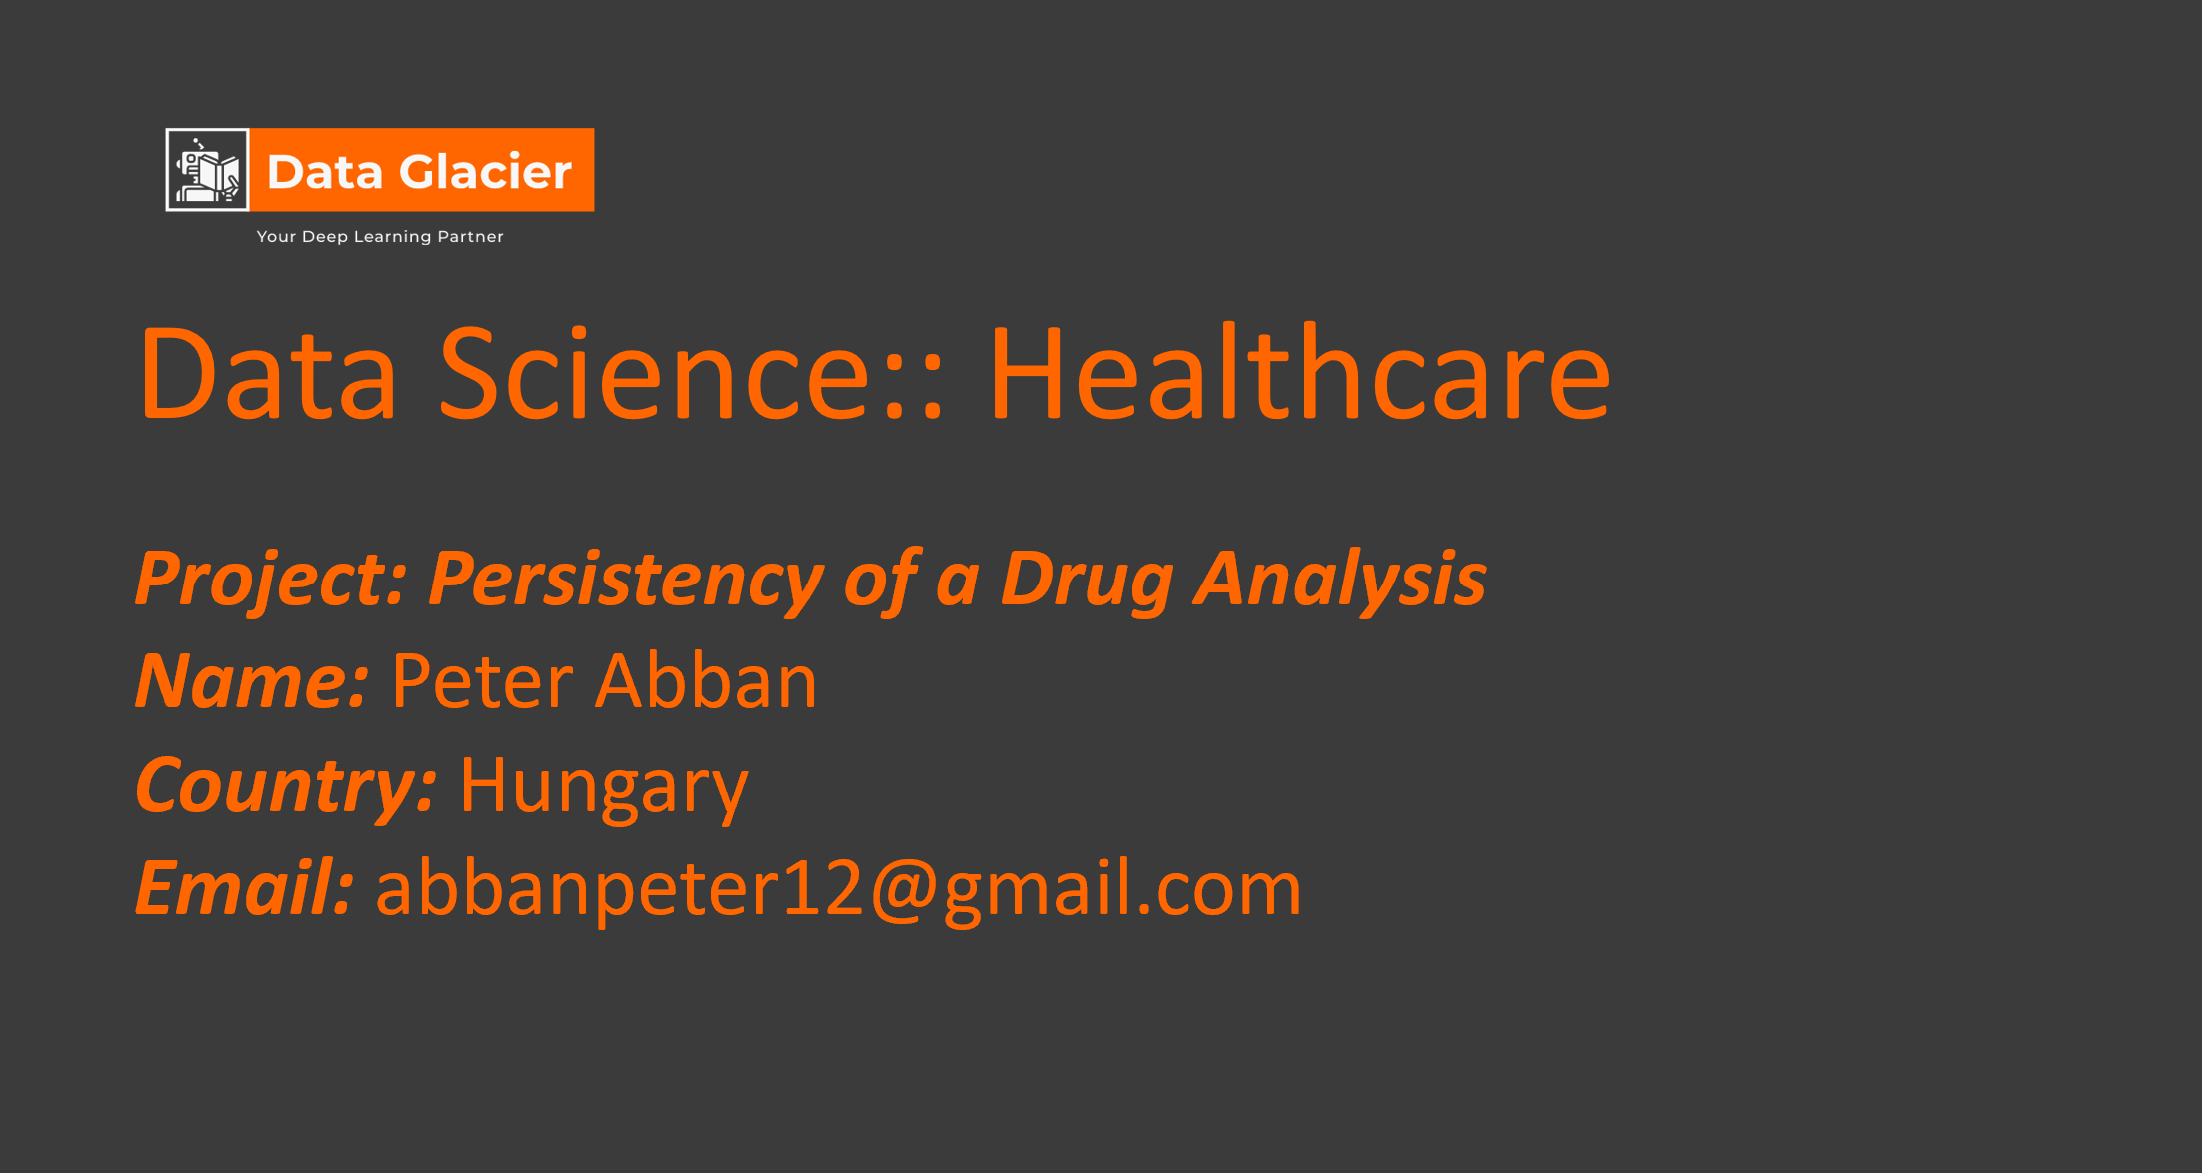

# **Project: Persistency of a Drug**

## I. **Project Details:**

**The project focuses on assisting _ABC pharmacy_ to understand the persistency of a drug as per a physician prescription**

## II. **Dataset Description** 

**This is a **_multivariate_** medical dataset that contains information about the administration of drugs by a physician. The dataset is categorized into _three section_: _Bucket_ which contains : _(Unique Row ID, Target Variable, Demographics, Provider Attributes, Clinical Factors and Disease/Treatment Factor)_, _Variable_: _( Patient ID, Persistency_Flag, Age, Race, Region etc.)_ and a _Variable Description_ which describes each of the variables used for the dataset**

## II. **Problem Description** 

**A critical challenge for pharmaceutical companies is understanding and monitoring
drug persistency, which reflects the extent to which patients adhere to prescribed
medication schedules over time. Poor adherence compromises treatment efficacy,
increases healthcare costs, and negatively impacts patient outcom  
es.
To address this challenge, ABC Pharmaceutical Company engaged an analytics firm
to develop an automated system based on some feature variables of the patients
By leveraging advanced analytics, the solution aims to enhance patient care, support
physicians in monitoring compliance, and inform strategic decisions for the
company’s pharmaceutical portfolio by making predictions on whether the patient is
persistent or non-persistent.**

## 1. **Importing the Dependencies:**

In [1068]:
# General Data manipulation models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", None)
print("All library loaded successfully")

All library loaded successfully


## 2. **Loading  Dataset:**

In [1069]:
drug_data = pd.read_csv("Healthcare_dataset_New.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### i. **Head or First 5 rows of data**

In [1070]:
drug_data.head() # loading first 5 rows of data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


### **ii. Size of dataset: shape**

In [1071]:
drug_data.shape

(3424, 69)

#### **_Observation_**: **Dataset has _3424 rows_ and _69 variable_ description also called the column features**

### **iii. Data Columns**

In [1072]:
drug_data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

### **iv. Data Types and the Number of These Categories: Nominal and Ordinal Data Type:**

In [1073]:
drug_data.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

#### **a. Checking for Categorical and Numerical variables**

#### **Categorial variables:**

In [1074]:
Categorical = drug_data.select_dtypes(include = ["object"]).columns.to_list()

In [1075]:
Categorical

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

In [1076]:
len(Categorical)

67

In [1077]:
Numerical = drug_data.select_dtypes(include  = ["int", "float"]).columns.to_list()

In [1078]:
Numerical

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [1079]:
len(Numerical)

2

### **v. Information About Dataset**

In [1080]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

#### **Observation**: **_We have exactly 3424 rows and hence no missing data values or NaN's_**

### **vi. Statistical Description of Dataset**

### a. Categorial

In [1081]:
drug_data.describe(include =["object"])

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,2,2,2,2,2,2,2,3,3,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,No change,Unknown,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,2619,2522,2488,2872,3007,1931,1951,1497,1497,1660,2229,3251,2557,3056,1891,1911,2072,2331,2425,2633,2607,2645,2747,2906,1765,2507,2775,2794,2242,2191,2451,2465,2787,2821,2853,2985,2927,3071,3285,3421,3294,3422,3297,3412,3168,2780,2954,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


### b. Numerical

In [1082]:
drug_data.describe(include =["int", "float"])

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

*  **Identifying duplicates: General duplicates checking**
*  **Changing of misappropriated data types**
*  **Checking for missing valus or NaN values**
*  **Proper alignment or positioning of feature columns**

### **i. Identifying Duplicates: General Duplicates Checking**

In [1083]:
drug_data.duplicated(keep ="first").sum()

0

## **ii. Changing of Misappropriated Data types**

#### **a. Age_Bucket**

In [1084]:
drug_data["Age_Bucket"].value_counts()

Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64

#### Converting Age_Bucket to Numerical

In [1085]:
age_mapping ={"<55":1,  "55-65": 2, "65-75":3, ">75": 4}
# Apply mapping to the Age_Bucket column
drug_data["Age_Bucket_Numerical"] = drug_data["Age_Bucket"].map(age_mapping)

In [1086]:
drug_data[["Age_Bucket", "Age_Bucket_Numerical"]].head(5)

,Age_Bucket,Age_Bucket_Numerical
0,>75,4
1,55-65,2
2,65-75,3
3,>75,4
4,>75,4


### NB: We create a dictionary and assign the Age_Bucket to numerical values:
#### {"<55": 1, "55-65":2, "65-75":3 ">75":4}

#### **b.Tscore_Bucket_Prior_Ntm**

In [1087]:
drug_data["Tscore_Bucket_Prior_Ntm"].value_counts()

Tscore_Bucket_Prior_Ntm
>-2.5     1951
<=-2.5    1473
Name: count, dtype: int64

In [1088]:
drug_data["Tscore_Bucket_Prior_Ntm_Numerical"] = drug_data["Tscore_Bucket_Prior_Ntm"].map({'<=-2.5': 1, '>-2.5': 2})

In [1089]:
drug_data[["Tscore_Bucket_Prior_Ntm_Numerical", "Tscore_Bucket_Prior_Ntm"]].head()

,Tscore_Bucket_Prior_Ntm_Numerical,Tscore_Bucket_Prior_Ntm
0,2,>-2.5
1,2,>-2.5
2,1,<=-2.5
3,2,>-2.5
4,1,<=-2.5


In [1090]:
drug_data["Tscore_Bucket_Prior_Ntm_Numerical"].value_counts()

Tscore_Bucket_Prior_Ntm_Numerical
2    1951
1    1473
Name: count, dtype: int64

#### **NB: {'<=-2.5': 1, '>-2.5': 2}**

#### **c. Tscore_Bucket_During_Rx**

In [1091]:
drug_data["Tscore_Bucket_During_Rx"].value_counts()

Tscore_Bucket_During_Rx
Unknown    1497
<=-2.5     1017
>-2.5       910
Name: count, dtype: int64

In [1092]:
drug_data["Tscore_Bucket_During_Rx"] = drug_data["Tscore_Bucket_During_Rx"].replace("Unknown", np.nan)

In [1093]:
drug_data["Tscore_Bucket_During_Rx"].value_counts()

Tscore_Bucket_During_Rx
<=-2.5    1017
>-2.5      910
Name: count, dtype: int64

In [1094]:
# Mapping the range of values to discrete values
drug_data["Tscore_Bucket_During_Rx_Numerical"] = drug_data["Tscore_Bucket_During_Rx"].map({'<=-2.5': 1, '>-2.5': 2})

In [1095]:
drug_data[["Tscore_Bucket_During_Rx_Numerical", "Tscore_Bucket_During_Rx"]].head()

,Tscore_Bucket_During_Rx_Numerical,Tscore_Bucket_During_Rx
0,1.0,<=-2.5
1,NaN,NaN
2,1.0,<=-2.5
3,1.0,<=-2.5
4,NaN,NaN


#### **NB: {'<=-2.5': 1, '>-2.5': 2}**

### iii. **Checking for Missing values or NaN values**

In [1096]:
# We replace all Unknowns with NaN
drug_data = drug_data.replace("Unknown", np.nan)

In [1097]:
drug_data.iloc[:, :69].isnull().sum().sort_values()

Ptid                                                                     0
Comorb_Osteoporosis_without_current_pathological_fracture                0
Comorb_Personal_history_of_malignant_neoplasm                            0
Comorb_Gastro_esophageal_reflux_disease                                  0
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations              0
Concom_Narcotics                                                         0
Concom_Systemic_Corticosteroids_Plain                                    0
Concom_Anti_Depressants_And_Mood_Stabilisers                             0
Concom_Fluoroquinolones                                                  0
Concom_Cephalosporins                                                    0
Concom_Macrolides_And_Similar_Types                                      0
Concom_Broad_Spectrum_Penicillins                                        0
Concom_Anaesthetics_General                                              0
Concom_Viral_Vaccines    

### Missing Values:
**i. Ethnicity -- 91**  
**ii. Ntm_Speciality --- 310**  
**iii. Change_T_Score --- 1497**  
**iv. Tscore_Bucket_During_Rx --- 1497**  
**v. Risk_Segment_During_Rx --- 1497**  
**vi. Change_Risk_Segment --- 2220**

In [1098]:
drug_data.select_dtypes(include = np.number).columns.to_list()

['Dexa_Freq_During_Rx',
 'Count_Of_Risks',
 'Age_Bucket_Numerical',
 'Tscore_Bucket_Prior_Ntm_Numerical',
 'Tscore_Bucket_During_Rx_Numerical']

### iv. **Proper Alignment or Positioning of Feature Columns**

In [1099]:
drug_data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Age_Bucket_Numerical,Tscore_Bucket_Prior_Ntm_Numerical,Tscore_Bucket_During_Rx_Numerical
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,NaN,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,4,2,1.0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,2,2,NaN
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2,3,1,1.0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,2,1.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,1,NaN


#### **Making Changes to the"Persistency_Flag"**

In [1100]:
columns_list = drug_data.columns.to_list()

In [1101]:
columns_list.remove("Persistency_Flag")

In [1102]:
columns_list.append("Persistency_Flag")

In [1103]:
drug_data = drug_data[columns_list]

In [1104]:
drug_data.columns[-3:]

Index(['Tscore_Bucket_Prior_Ntm_Numerical',
       'Tscore_Bucket_During_Rx_Numerical', 'Persistency_Flag'],
      dtype='object')

In [1105]:
# Calculate the percentage of missing values for each column
missing_percentage = drug_data.isnull().sum() / len(drug_data) * 100

# Display columns with missing values and their percentages
print("Percentage of missing values per column:")
display(missing_percentage[missing_percentage > 0])

Percentage of missing values per column:


Ethnicity                             2.657710
Ntm_Speciality                        9.053738
Risk_Segment_During_Rx               43.720794
Tscore_Bucket_During_Rx              43.720794
Change_T_Score                       43.720794
Change_Risk_Segment                  65.099299
Tscore_Bucket_During_Rx_Numerical    43.720794
dtype: float64

In [1106]:
## Checking for missing values:

In [1107]:
drug_data["Ethnicity"].value_counts() # Categorical

Ethnicity
Not Hispanic    3235
Hispanic          98
Name: count, dtype: int64

In [1108]:
drug_data["Ntm_Speciality"].value_counts().head() # Categorical

Ntm_Speciality
GENERAL PRACTITIONER         1535
RHEUMATOLOGY                  604
ENDOCRINOLOGY                 458
ONCOLOGY                      225
OBSTETRICS AND GYNECOLOGY      90
Name: count, dtype: int64

In [1109]:
drug_data["Risk_Segment_During_Rx"].value_counts() # Categorical

Risk_Segment_During_Rx
HR_VHR    965
VLR_LR    962
Name: count, dtype: int64

In [1110]:
drug_data["Tscore_Bucket_During_Rx"].value_counts()

Tscore_Bucket_During_Rx
<=-2.5    1017
>-2.5      910
Name: count, dtype: int64

In [1111]:
drug_data["Change_T_Score"].value_counts()

Change_T_Score
No change    1660
Worsened      173
Improved       94
Name: count, dtype: int64

In [1112]:
drug_data["Change_Risk_Segment"].value_counts()

Change_Risk_Segment
No change    1052
Worsened      121
Improved       22
Name: count, dtype: int64

In [1113]:
drug_data["Race"].value_counts()

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

In [1114]:
drug_data["Region"].value_counts()

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64

## 5. Feature Enginering Process: **_Second Data Cleaning Steps_**

#### **NB: Missing values in the dataset will be addressed based on the type and proportion of missingness for each feature:**


* #### **Categorical Values:**

**_Ethnicity_ and _Ntm_Speciality_ have a relatively small number of missing
values. These will be imputed using the mode, representing the most
frequent category**

In [1115]:
drug_data["Ethnicity"].value_counts()

Ethnicity
Not Hispanic    3235
Hispanic          98
Name: count, dtype: int64

In [1116]:
drug_data["Ethnicity"] = drug_data["Ethnicity"].fillna(drug_data["Ethnicity"].mode()[0])

In [1117]:
drug_data["Ntm_Speciality"] = drug_data["Ntm_Speciality"].fillna(drug_data["Ethnicity"].mode()[0])

* #### **Numerical/Clinical Values:**

**_Change_T_Score_, _Tscore_Bucket_During_Rx_, _Risk_Segment_During_Rx_, and
_Change_Risk_Segment_ have a higher proportion of missing values and require
more sophisticated imputation. After ensuring that these features are
appropriately transformed to numerical representations (where necessary), KNearest Neighbors (KNN) imputation will be applied.**

#### **i. Risk_Segment_During_Rx, Change_T_Score, Change_Risk_Segment**

In [1118]:
ohe = OneHotEncoder(drop = "first", sparse_output= False)

In [1119]:
#drug_data["Risk_Segment_During_Rx"] = ohe.fit_transform(drug_data[["Risk_Segment_During_Rx"]])

In [1120]:
drug_data_New = drug_data.copy(deep = True)

In [1121]:
drug_data_New["Risk_Segment_During_Rx"] = ohe.fit_transform(drug_data_New[["Risk_Segment_During_Rx"]])

In [1122]:
drug_data_New["Change_T_Score"] = ohe.fit_transform(drug_data_New[["Change_T_Score"]])

In [1123]:
drug_data_New["Change_Risk_Segment"] = ohe.fit_transform(drug_data_New[["Change_Risk_Segment"]])

In [1124]:
drug_data_New.head()

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Age_Bucket_Numerical,Tscore_Bucket_Prior_Ntm_Numerical,Tscore_Bucket_During_Rx_Numerical,Persistency_Flag
0,P1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,1.0,<=-2.5,1.0,0.0,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,4,2,1.0,Persistent
1,P2,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,0.0,NaN,0.0,0.0,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,2,2,NaN,Non-Persistent
2,P3,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,0.0,<=-2.5,1.0,1.0,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2,3,1,1.0,Non-Persistent
3,P4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,0.0,<=-2.5,1.0,1.0,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,2,1.0,Non-Persistent
4,P5,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,0.0,NaN,0.0,0.0,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,1,NaN,Non-Persistent


In [1125]:
drug_data_New[["Risk_Segment_During_Rx", "Change_T_Score", "Change_Risk_Segment"]].dtypes

Risk_Segment_During_Rx    float64
Change_T_Score            float64
Change_Risk_Segment       float64
dtype: object

In [1126]:
cols_for_knn = ["Risk_Segment_During_Rx", "Change_T_Score", "Change_Risk_Segment", "Tscore_Bucket_During_Rx_Numerical"]

In [1127]:
Imputer = KNNImputer(n_neighbors = 5)

In [1128]:
drug_data_New[cols_for_knn] = Imputer.fit_transform(drug_data_New[cols_for_knn])

In [1129]:
drug_data_New[cols_for_knn].isna().sum()

Risk_Segment_During_Rx               0
Change_T_Score                       0
Change_Risk_Segment                  0
Tscore_Bucket_During_Rx_Numerical    0
dtype: int64

In [1138]:
# Calculate the percentage of missing values for each column
missing_percentage = drug_data_New.isnull().sum() / len(drug_data_New) * 100

# Display columns with missing values and their percentages
print("Percentage of missing values per column:")
display(missing_percentage[missing_percentage > 0])

Percentage of missing values per column:


Series([], dtype: float64)

#### **Observation: Missing values for the specified categorical columns have been solved using both _OneHotEncoder and KNNImputer_**

In [1131]:
drug_data_New = drug_data_New.drop(columns = ["Tscore_Bucket_During_Rx"], axis = 1)

In [1132]:
drug_data_New.head(5)

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Age_Bucket_Numerical,Tscore_Bucket_Prior_Ntm_Numerical,Tscore_Bucket_During_Rx_Numerical,Persistency_Flag
0,P1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,1.0,1.0,0.0,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,4,2,1.0,Persistent
1,P2,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,0.0,0.0,0.0,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,2,2,1.0,Non-Persistent
2,P3,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,0.0,1.0,1.0,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2,3,1,1.0,Non-Persistent
3,P4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,0.0,1.0,1.0,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,2,1.0,Non-Persistent
4,P5,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,0.0,0.0,0.0,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,1,1.0,Non-Persistent


In [1133]:
drug_data_New.isna().sum().sort_values

<bound method Series.sort_values of Ptid                                                                  0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                        0
Frag_Frac_Prior_Ntm         

#### **NB: All missing values in the indicated columns have now been solved. These feature columns will be selected from the drug_data_New and added to the drug_data for future transformation**

#### **Renaming columns of missing values in data_drug_New for better clarity when concatenated with drug_data**

In [1136]:
drug_data_New.rename({"Risk_Segment_During_Rx": "Risk_Segment_During_Rx_New", "Change_T_Score": "Change_T_Score_New",
                      "Change_Risk_Segment": "Change_Risk_Segment_New", "Tscore_Bucket_During_Rx_Numerical": "Tscore_Bucket_During_Rx_Numerical_New"},  axis = 1, inplace = True)

In [1137]:
drug_data_New.head(5)

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx_New,Change_T_Score_New,Change_Risk_Segment_New,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Age_Bucket_Numerical,Tscore_Bucket_Prior_Ntm_Numerical,Tscore_Bucket_During_Rx_Numerical_New,Persistency_Flag
0,P1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,1.0,1.0,0.0,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,4,2,1.0,Persistent
1,P2,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,0.0,0.0,0.0,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,2,2,1.0,Non-Persistent
2,P3,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,0.0,1.0,1.0,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2,3,1,1.0,Non-Persistent
3,P4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,0.0,1.0,1.0,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,2,1.0,Non-Persistent
4,P5,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,0.0,0.0,0.0,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,4,1,1.0,Non-Persistent
